In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
x = numpy.arange(-5,5,0.1)
y = numpy.arange(-5,5,0.1)


In [3]:
#define the Joukowski transformation

def j_trans(z,c):
    j_trans = z + c**2/z
    return j_trans

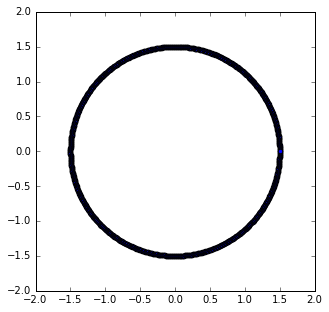

In [4]:
#using the polar coordinate system to draw a circle

theta = numpy.linspace(0,2*math.pi,1000)
R = 1.5                                          #radius
c = 1.                                           #some kinds of constant, we use c = 1 here
x_circle = R*numpy.cos(theta)                    
y_circle = R*numpy.sin(theta)

#plot the circle to see if it's right 
pyplot.figure(figsize=(5,5))
pyplot.scatter(x_circle,y_circle)

In [5]:
#transform from z plane to xi plane

z = x_circle + y_circle*1j
z_jtrans = j_trans(z,c)

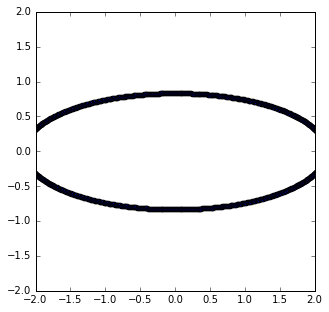

In [6]:
#plot the result of transformation

pyplot.figure(figsize = (5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.scatter(z_jtrans.real,z_jtrans.imag)

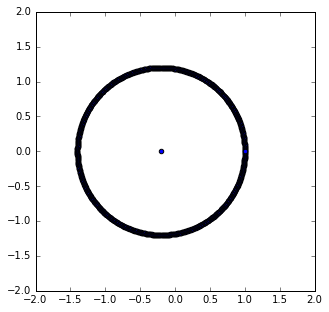

In [7]:
#the second case, with R = 1.2, c = 1, center at (x,y) = (c-R,0)

R_2 = 1.2
c_2 = 1.
x_2 = c_2 - R_2 + R_2*numpy.cos(theta)
y_2 = R_2*numpy.sin(theta)
pyplot.figure(figsize = (5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.scatter(x_2,y_2)
pyplot.scatter(c_2-R_2,0)

In [8]:
#the second case, transform from z plane to xi plane

z_2 = x_2 +y_2*1j
z_2trans = j_trans(z_2,c_2)

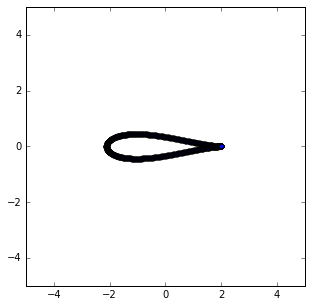

In [9]:
#plot the result

pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_2trans.real,z_2trans.imag)

---

In [10]:
#the third case 

delta_x = 0.1
delta_y = 0.1
R_3 = ((c-(-delta_x))**2 + delta_y**2)**0.5

In [11]:
#transform to xi plane

x_3 = -delta_x +R_3*numpy.cos(theta)
y_3 = R_3*numpy.sin(theta)+delta_y
z_3 = x_3+y_3*1j
z_3trans = j_trans(z_3,c)

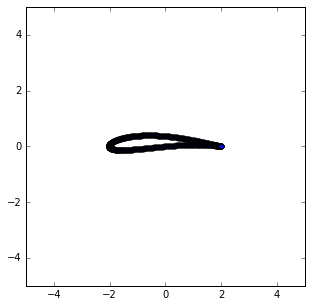

In [12]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_3trans.real,z_3trans.imag)

---

In [13]:
#the one that is going to use in the following assignment, R = 1.15, centered at (-0.15,0)


x_center, y_center = -0.15, 0
R_4 = 1.15
x_4 = x_center + R_4*numpy.cos(theta)
y_4 = y_center + R_4*numpy.sin(theta)
z_4 = x_4 + y_4*1j
z_4trans = j_trans(z_4,c)


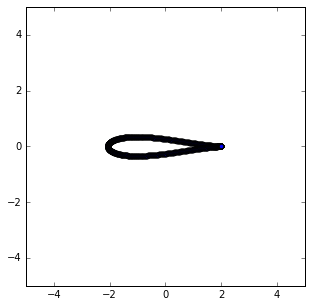

In [14]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_4trans.real,z_4trans.imag)

In [15]:
#make the meshgrids of polar coordinate

N_r = 100
N_theta = 145
r = numpy.linspace(R_4,5,N_r)
theta_4 = numpy.linspace(0,2*math.pi,N_theta)
R,THETA = numpy.meshgrid(r,theta_4)

In [16]:
#calculate the meshgrid points' location on the z plane

X = x_center + R*numpy.cos(THETA)
Y = y_center + R*numpy.sin(THETA)


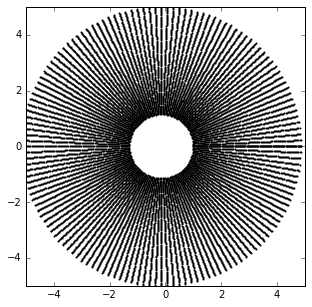

In [17]:
#plot to check the result

pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(X,Y,s=1)

In [18]:
#transform the meshgrid points to xi plane

Z = X+1j*Y
Z_trans=j_trans(Z,c)

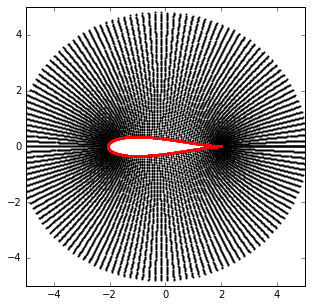

In [19]:
#plot to check the result

pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(Z_trans.real,Z_trans.imag,s=1)
pyplot.scatter(z_4trans.real,z_4trans.imag,color = 'r',s=1)

In [54]:
#velocity of the freestream

u_freestream = 1.
v_freestream = 0.
psi_freestream = Y

In [55]:
#doublet and the free stream
kappa = 2*math.pi*R_4**2*u_freestream                         # strength of the doublet
x_doublet, y_doublet = -0.15, 0.0    # location of the doublet

In [57]:
#velocity of the doublet

u_doublet = - kappa/(2*math.pi)*((X-x_center)**2-(Y-y_center)**2)/((X-x_center)**2+(Y-y_center)**2)**2
v_doublet = - kappa/(2*math.pi)*2*(X-x_center)*(Y-y_center)/((X-x_center)**2+(Y-y_center)**2)**2
psi_doublet = -kappa/(2*math.pi)*(Y-y_center)/((X-x_center)**2 +(Y-y_center)**2)

In [58]:
u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet +psi_freestream

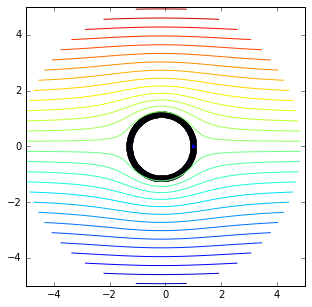

In [68]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(X,Y,psi,levels = numpy.linspace(-5,5,30))
pyplot.scatter(x_4,y_4)

C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


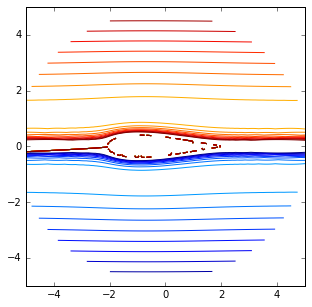

In [70]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(Z_trans.real,Z_trans.imag,j_trans(psi,c),levels = numpy.linspace(-5,5,30))

In [34]:
kappa

8.309512568745001

In [43]:
numpy.shape(u)

(100, 100)